# Repasando clase anterior, market beta 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import random

In [2]:
# Get tickers 
tickers = ['VTI', 'BRK-A', 'AMZN']
start_date = '2015-01-01'

# Descargar precios y graficar
St = yf.download(tickers, start=start_date)['Close']

returns = St.pct_change().dropna()
returns.head()

[*********************100%%**********************]  3 of 3 completed


,AMZN,BRK-A,VTI
Date,,,
2015-01-05,-0.020517,-0.011717,-0.017183
2015-01-06,-0.022833,-0.002398,-0.009798
2015-01-07,0.010600,0.013745,0.011932
2015-01-08,0.006836,0.014319,0.017640
2015-01-09,-0.011749,-0.008845,-0.008290


In [3]:
# Normalice Amazon y Berkshiere
St['normalized_amazon'] = St.AMZN / St.AMZN.iloc[0]
St['normalized_brk'] = St['BRK-A'] / St['BRK-A'].iloc[0]
St['normalized_vti'] = St.VTI / St.VTI.iloc[0]

<Axes: xlabel='Date'>

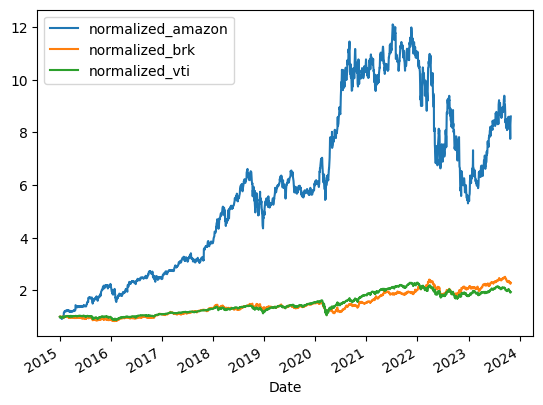

In [4]:
# Grafique Amazon y Berkshiere
St[['normalized_amazon', 'normalized_brk', 'normalized_vti']].plot()

### Calcule la beta de Berkshiere

$$BRK = \beta_0 + \beta_1 * VTI $$

In [5]:
# skitlearn no acepta series, solo data frames 

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = returns[['VTI']]
y = returns[['BRK-A']]
model.fit(X, y)
model.coef_[0][0]

0.799302786945117

In [7]:
predicciones = model.predict(X) 

Text(0, 0.5, 'BRK-A')

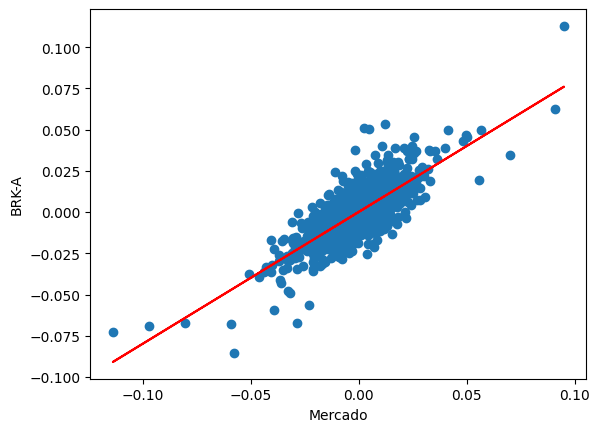

In [8]:
# Grafique las predicciones
plt.scatter(returns['VTI'], returns['BRK-A'])
plt.plot(returns['VTI'], predicciones, color= 'red')
plt.xlabel('Mercado')
plt.ylabel('BRK-A')


In [9]:
# Obtenga el R2
from sklearn.metrics import r2_score 
r2_score(y_pred= predicciones, y_true= y)

0.5950473173325058

##  BRK  = 0.79 * Mercado ##

In [10]:
# Obtenga el r2 con el paquete


### Calcule la beta de Amazon 

In [11]:
model = LinearRegression()
X = returns[['VTI']]
y = returns[['AMZN']]
model.fit(X, y) 
model.coef_[0][0]

1.1113777301548406

In [12]:
predicciones = model.predict(X) 

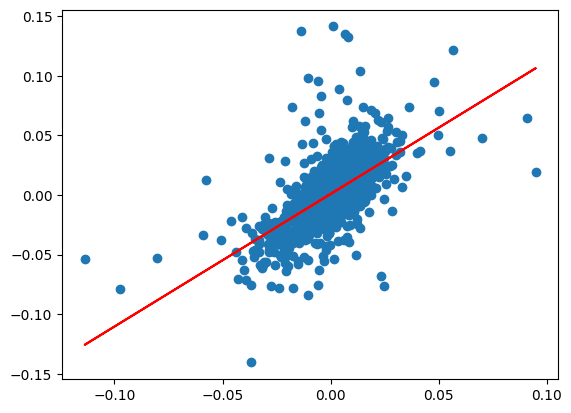

In [13]:
# Grafique la beta de Amazon 
plt.scatter(returns.VTI, returns.AMZN) 
plt.plot(returns.VTI, predicciones, color = 'red')


In [14]:
# Obtenga el R2 de Amazon 
r2_score(y_pred = predicciones, y_true= y)  

0.38124933427018926

Text(0, 0.5, 'Rendimiento Estimado')

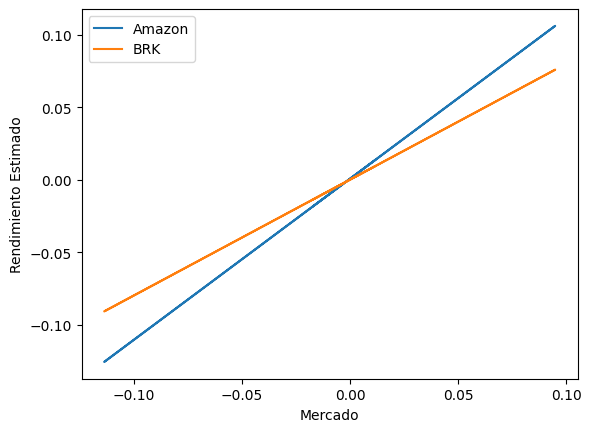

In [15]:
X = returns[['VTI']]
y_amazon = returns[['AMZN']]
y_brk = returns[['BRK-A']]
model1 = LinearRegression().fit(X, y_amazon)
model2 = LinearRegression().fit(X, y_brk)

predicciones_modelo_1 = model1.predict(X) 
predicciones_modelo_2 = model2.predict(X) 

plt.plot(returns.VTI, predicciones_modelo_1, label = 'Amazon')
plt.plot(returns.VTI, predicciones_modelo_2, label = 'BRK')
plt.legend()
plt.xlabel('Mercado') 
plt.ylabel('Rendimiento Estimado')


In [16]:
# Ahora con el paquete 


### CAPM 

Capital asset pricing model / Modelo de valoración de activos financieros 

1- En realidad los inversionistas se interesan por el _risk premium_ que es el diferencial entre el riesgo que están tomando y el rendimiento libre de riesgo (si una inversión me da menos que CETES, mejor ni me meto)

2- En un monto donde lo único que importa para  predecir el rendimiento de un activo es la beta y el $R^2$ es igual a 1, esta igualdad se tiene que cumplir:


$$\frac{E(R_i) - rf}{\beta_i} = E(R_m) - Rf$$


In [17]:
### Ejemplo
rf = 0.05
activo = 0.11
mercado = 0.1

In [18]:
# Calcule la prima de riesgo del mercado
prima_mercado = mercado - rf 
prima_mercado

0.05

In [19]:
# Calcule la prima de riesgo del activo
prima_activo = activo - rf
prima_activo

0.06

In [20]:
## Las primas no son iguales
prima_activo == prima_mercado

False

In [21]:
## Si lo unico que importa es la beta y es un factor de escala, en realidad peudo escribir esta ecuación así


$$\frac{0.06}{\beta} = 0.05$$  

In [29]:
## Despejando
beta = prima_activo / prima_mercado
beta

1.2

In [23]:
## Quiere decir que:


Despejando, podemos concluir esto:

$$E[r_i] = rf + \beta * (E[m] - rf) $$

In [24]:
### Ejemplo: ¿cuál es el valor esperado del rendimiento anual de Amazon en los siguientes 5 años?
rf + beta * (prima_mercado)


0.11

### Problema 1 del CAPM

1- Como hemos visto en estas dos últimas clases (y verán en su tarea), market beta no explica en un 100% la variación


2- Market beta puede cambiar con el tiempo

In [25]:
# Para cada uno de los años con registro, calcula el R2 de Berkshiere y beta
returns['year'] = [i.year for i in returns.index]
years_analysis = np.unique(returns.year)

betas = []
years = []
r2_scores = []

for i in years_analysis:
    flag_df = returns.query("year == @i")
    model = LinearRegression()
    X = flag_df[['VTI']]
    y = flag_df[['BRK-A']]
    model.fit(X, y) 
    #Obtener Beta 
    beta_year = model.coef_[0][0]
    betas.append(beta_year)
    #Obtener r2 
    predicciones = model.predict(X) 
    r2_year = r2_score(y_true= y, y_pred = predicciones)
    r2_scores.append(r2_year)

    years.append(i) 

In [26]:
# Lo mismo pero con Amazon
df_brk = pd.DataFrame()
df_brk['year'] = years
df_brk['betas'] = betas
df_brk['r2'] = r2_scores
df_brk

,year,betas,r2
0,2015,0.856661,0.667512
1,2016,0.767951,0.548931
2,2017,0.934311,0.362080
3,2018,1.024548,0.615851
4,2019,0.862401,0.539441
5,2020,0.823066,0.738118
6,2021,0.625579,0.298171
7,2022,0.699430,0.614372
8,2023,0.679234,0.397312


In [27]:
# Para cada uno de los años con registro, calcula el R2 de Berkshiere y beta
returns['year'] = [i.year for i in returns.index]
years_analysis = np.unique(returns.year)

betas = []
years = []
r2_scores = []

for i in years_analysis:
    flag_df = returns.query("year == @i")
    model = LinearRegression()
    X = flag_df[['VTI']]
    y = flag_df[['AMZN']]
    model.fit(X, y) 
    #Obtener Beta 
    beta_year = model.coef_[0][0]
    betas.append(beta_year)
    #Obtener r2 
    predicciones = model.predict(X) 
    r2_year = r2_score(y_true= y, y_pred = predicciones)
    r2_scores.append(r2_year)

    years.append(i) 

In [28]:
# Lo mismo pero con Amazon
df_amazon = pd.DataFrame()
df_amazon['year'] = years
df_amazon['betas'] = betas
df_amazon['r2'] = r2_scores
df_amazon

,year,betas,r2
0,2015,1.123615,0.263288
1,2016,1.038831,0.225823
2,2017,1.166869,0.153982
3,2018,1.639771,0.589354
4,2019,1.292717,0.511236
5,2020,0.669547,0.352775
6,2021,0.998601,0.316676
7,2022,1.596214,0.632996
8,2023,1.522820,0.364391


¿qué se concluye?

### Teorícamente tiene mucho sentido pensar en market beta, es un hecho que existen acciones sensibles al estado del mercado, el problema es que el mundo y las betas cambian.

A pesar de que es cierto que los rendimientos de un portafolio a largo plazo dependen de su beta, no sabemos como pronosticar el beta futuro. 



### Sin embargo, este modelo CAPM es un muy buen modelo mentar para entender como funciona el mercado.